In [15]:
#Social_Network_Ads.csv

**Importing the libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [17]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [18]:
from sklearn.model_selection import train_test_split
x = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
i=1
model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)

**Predicting the Test set results**

In [21]:
predict=model.predict(x_test)
predict

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predict))

Train set Accuracy:  0.9964285714285714
Test set Accuracy:  0.7833333333333333


**Making the Confusion Matrix**

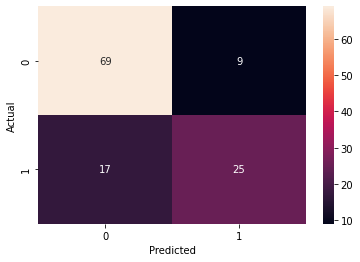

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)
confusion_matrix = pd.crosstab(y_test, predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, f1_score
f1_score(y_test,y_pred)

**Visualising the Test set results**

In [26]:
print('ROC score train', roc_auc_score(y_train, model.predict(x_train)))

ROC score train 0.9972067039106145


In [ ]:
print('ROC test', roc_auc_score(y_test, y_pred))

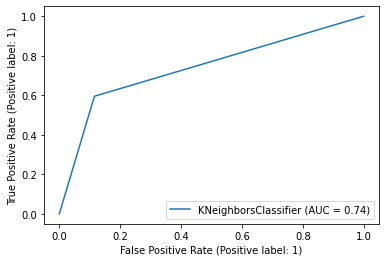

In [27]:
RocCurveDisplay.from_estimator(model,x_test,y_test)